## Data loading

### Subtask:
Load the "garment_sales.csv" file into a Pandas DataFrame.


**Reasoning**:
Load the "garment_sales.csv" file into a pandas DataFrame and display the first 5 rows.



In [3]:
import pandas as pd
df = pd.read_csv('garment_sales.csv')
display(df.head())

,Order ID,Date,Product ID,Category,Gender,Age,Item Purchased,Order Location,Sales Price,Quantity,Total Sales,Rating
0,189440,7/21/2024,BF1543,Garment,Male,30,Blouse,New Jersey,100,1,100,4
1,187385,7/20/2024,BF1543,Garment,Male,32,Sweater,Las Vegas,100,1,100,3
2,181844,7/21/2024,BF1544,Garment,Female,26,Jeans,Cardiff,9,1,49,2
3,197934,8/19/2024,BF1544,Footwear,Male,28,Sandals,Pittsburgh,9,2,18,3
4,122470,1/6/2024,BF1545,Garment,Female,19,Blouse,Miami,10,3,30,5


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify missing values, data types of columns, and the distribution of key variables like total sales.


**Reasoning**:
Explore the dataset by examining its shape, data types, descriptive statistics, missing values, and the distribution of the 'Total Sales' column.



In [7]:
# Data Shape and Info
print("Data Shape:", df.shape)
print("\nData Info:")
df.info()

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Data Type Check (example for 'Date' and 'Total Sales')
print("\nData Types:")
print(f"Original 'Date' type: {df['Date'].dtype}")
print(f"Original 'Total Sales' type: {df['Total Sales'].dtype}")

# Convert 'Date' to datetime if needed
if df['Date'].dtype != 'datetime64[ns]':
    df['Date'] = pd.to_datetime(df['Date'])
    print(f"Converted 'Date' type: {df['Date'].dtype}")

Data Shape: (3901, 12)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3901 entries, 0 to 3900
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Order ID        3901 non-null   int64 
 1   Date            3901 non-null   object
 2   Product ID      3901 non-null   object
 3   Category        3901 non-null   object
 4   Gender          3901 non-null   object
 5    Age            3901 non-null   int64 
 6   Item Purchased  3901 non-null   object
 7   Order Location  3901 non-null   object
 8   Sales Price     3901 non-null   int64 
 9   Quantity        3901 non-null   int64 
 10  Total Sales     3901 non-null   int64 
 11  Rating          3901 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 365.8+ KB

Descriptive Statistics:
            Order ID          Age  Sales Price     Quantity  Total Sales  \
count    3901.000000  3901.000000  3901.000000  3901.000000  3901.000000   
mean   159498

In [9]:
# Missing Values Analysis
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values)


Missing Values:
Order ID          0
Date              0
Product ID        0
Category          0
Gender            0
 Age              0
Item Purchased    0
Order Location    0
Sales Price       0
Quantity          0
Total Sales       0
Rating            0
dtype: int64


## Data cleaning

### Subtask:
Clean the 'Total Sales' column by handling outliers.


**Reasoning**:
Identify outliers in the 'Total Sales' column using the IQR rule and handle them by winsorizing. Then, re-examine the distribution and descriptive statistics of the 'Total Sales' column.



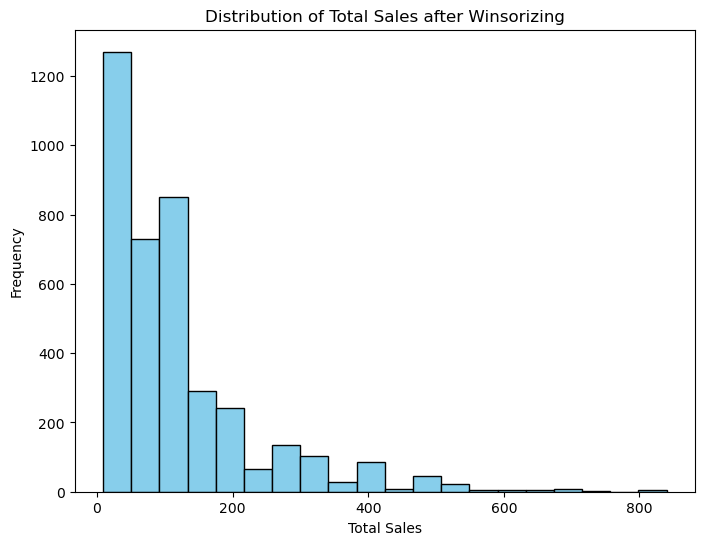

count    3901.000000
mean      115.734427
std       114.811503
min         9.000000
25%        40.000000
50%        90.000000
75%       137.000000
max       840.000000
Name: Total Sales, dtype: float64


In [13]:
import matplotlib.pyplot as plt

# Calculate Q1, Q3, and IQR
Q1 = df['Total Sales'].quantile(0.25)
Q3 = df['Total Sales'].quantile(0.95)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Winsorize the 'Total Sales' column
df['Total Sales'] = df['Total Sales'].clip(lower=lower_bound, upper=upper_bound)

# Re-examine the distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Total Sales'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Total Sales after Winsorizing')
plt.show()

# Print descriptive statistics
print(df['Total Sales'].describe())

## Feature engineering

### Subtask:
Engineer new features from the existing 'Date' column in the DataFrame.


**Reasoning**:
Extract the month, year, and day of the week from the 'Date' column and create new features like 'season' and 'weekend'.



In [17]:
# Extract month, year, and day of the week
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_of_week'] = df['Date'].dt.dayofweek

# Create 'season' feature based on month
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

df['season_engineered'] = df['month'].apply(get_season)

# Create 'weekend' indicator
df['weekend'] = (df['day_of_week'] >= 5).astype(int)

display(df.head())

,Order ID,Date,Product ID,Category,Gender,Age,Item Purchased,Order Location,Sales Price,Quantity,Total Sales,Rating,month,year,day_of_week,season_engineered,weekend
0,189440,2024-07-21,BF1543,Garment,Male,30,Blouse,New Jersey,100,1,100,4,7,2024,6,Summer,1
1,187385,2024-07-20,BF1543,Garment,Male,32,Sweater,Las Vegas,100,1,100,3,7,2024,5,Summer,1
2,181844,2024-07-21,BF1544,Garment,Female,26,Jeans,Cardiff,9,1,49,2,7,2024,6,Summer,1
3,197934,2024-08-19,BF1544,Footwear,Male,28,Sandals,Pittsburgh,9,2,18,3,8,2024,0,Summer,0
4,122470,2024-01-06,BF1545,Garment,Female,19,Blouse,Miami,10,3,30,5,1,2024,5,Winter,1


In [19]:
print("Data Shape:", df.shape)
print("\nData Info:")
df.info()

print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values)

Data Shape: (3901, 17)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3901 entries, 0 to 3900
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           3901 non-null   int64         
 1   Date               3901 non-null   datetime64[ns]
 2   Product ID         3901 non-null   object        
 3   Category           3901 non-null   object        
 4   Gender             3901 non-null   object        
 5    Age               3901 non-null   int64         
 6   Item Purchased     3901 non-null   object        
 7   Order Location     3901 non-null   object        
 8   Sales Price        3901 non-null   int64         
 9   Quantity           3901 non-null   int64         
 10  Total Sales        3901 non-null   int64         
 11  Rating             3901 non-null   int64         
 12  month              3901 non-null   int32         
 13  year               3901 non-

## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets as instructed, using the specified features and target variable.



In [23]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['Total Sales', 'Order ID', 'Product ID', 'Date'])
y = df['Total Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Display shapes of the resulting sets (optional but helpful for verification)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2340, 13)
X_test shape: (1561, 13)
y_train shape: (2340,)
y_test shape: (1561,)


## Model training

### Subtask:
Train three regression models: Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor to predict total sales.


**Reasoning**:
Train three regression models: Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor to predict total sales.



In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression # Import LinearRegression

# Identify categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep numerical features as they are
)

# Create a pipeline that includes the preprocessor and the Linear Regression model
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LinearRegression())])


# Now, fit the pipeline instead of the model directly
lr_pipeline.fit(X_train, y_train)

# You can apply similar pipelines for your RandomForestRegressor and GradientBoostingRegressor

C:\Users\Appaso\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Category', 'Gender',
                                                   'Item Purchased',
                                                   'Order Location',
                                                   'season_engineered'])])),
                ('classifier', LinearRegression())])

**Reasoning**:
The error message indicates that some of the features in X_train are strings (categorical variables), which the linear regression model cannot handle directly.  We need to convert the categorical features to numerical representations using one-hot encoding.



In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # Import RandomForestRegressor and GradientBoostingRegressor

# Identify categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep numerical features as they are
)


# Create pipelines for each model
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LinearRegression())])
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestRegressor())])
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', GradientBoostingRegressor())])


# Fit the pipelines (train the models)
lr_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)
gb_pipeline.fit(X_train, y_train)

C:\Users\Appaso\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Category', 'Gender',
                                                   'Item Purchased',
                                                   'Order Location',
                                                   'season_engineered'])])),
                ('classifier', GradientBoostingRegressor())])

## Model optimization

### Subtask:
Optimize the hyperparameters of the three trained regression models (Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor) using RandomizedSearchCV.


**Reasoning**:
Optimize the hyperparameters of the three trained regression models using RandomizedSearchCV.



**Reasoning**:
The previous code block failed due to an invalid parameter 'normalize' for Linear Regression.  I will remove this parameter from the parameter grid for Linear Regression and re-run the hyperparameter optimization.



In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Define parameter grids for each model
param_grid_lr = {
    'classifier__fit_intercept': [True, False]
}

param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.5],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.8, 0.9, 1.0]
}

# Create RandomizedSearchCV objects
random_search_lr = RandomizedSearchCV(estimator=lr_pipeline, param_distributions=param_grid_lr, n_iter=2, scoring='neg_mean_squared_error', cv=3, random_state=42, n_jobs=-1)
random_search_rf = RandomizedSearchCV(estimator=rf_pipeline, param_distributions=param_grid_rf, n_iter=10, scoring='neg_mean_squared_error', cv=3, random_state=42, n_jobs=-1)
random_search_gb = RandomizedSearchCV(estimator=gb_pipeline, param_distributions=param_grid_gb, n_iter=10, scoring='neg_mean_squared_error', cv=3, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV objects
random_search_lr.fit(X_train, y_train)
random_search_rf.fit(X_train, y_train)
random_search_gb.fit(X_train, y_train)

# Get the best estimators
best_lr = random_search_lr.best_estimator_
best_rf = random_search_rf.best_estimator_
best_gb = random_search_gb.best_estimator_

## Model evaluation

### Subtask:
Evaluate the performance of the optimized models (Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor) on the test set.


**Reasoning**:
Evaluate the performance of the optimized models on the test set using the specified metrics and display the results in a structured format.



In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Predict on the test set
y_pred_lr = best_lr.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_gb = best_gb.predict(X_test)

# Calculate evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return {'Model': model_name, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAE': mae}

metrics_lr = evaluate_model(y_test, y_pred_lr, 'Linear Regression')
metrics_rf = evaluate_model(y_test, y_pred_rf, 'Random Forest')
metrics_gb = evaluate_model(y_test, y_pred_gb, 'Gradient Boosting')

# Store metrics in a DataFrame
all_metrics = pd.DataFrame([metrics_lr, metrics_rf, metrics_gb])
display(all_metrics)

,Model,MSE,RMSE,R2,MAE
0,Linear Regression,2485.539469,49.855185,0.803648,34.456022
1,Random Forest,732.320043,27.061412,0.942148,8.886034
2,Gradient Boosting,264.403048,16.260475,0.979113,8.627479


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Predict on the test set
y_pred_gb = best_gb.predict(X_test)
# Calculate evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return {'Model': model_name, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAE': mae}

metrics_gb = evaluate_model(y_test, y_pred_gb, 'Gradient Boosting')

# Store metrics in a DataFrame
all_metrics = pd.DataFrame([metrics_gb])
display(all_metrics)

,Model,MSE,RMSE,R2,MAE
0,Gradient Boosting,264.403048,16.260475,0.979113,8.627479


<Figure size 700x600 with 0 Axes>

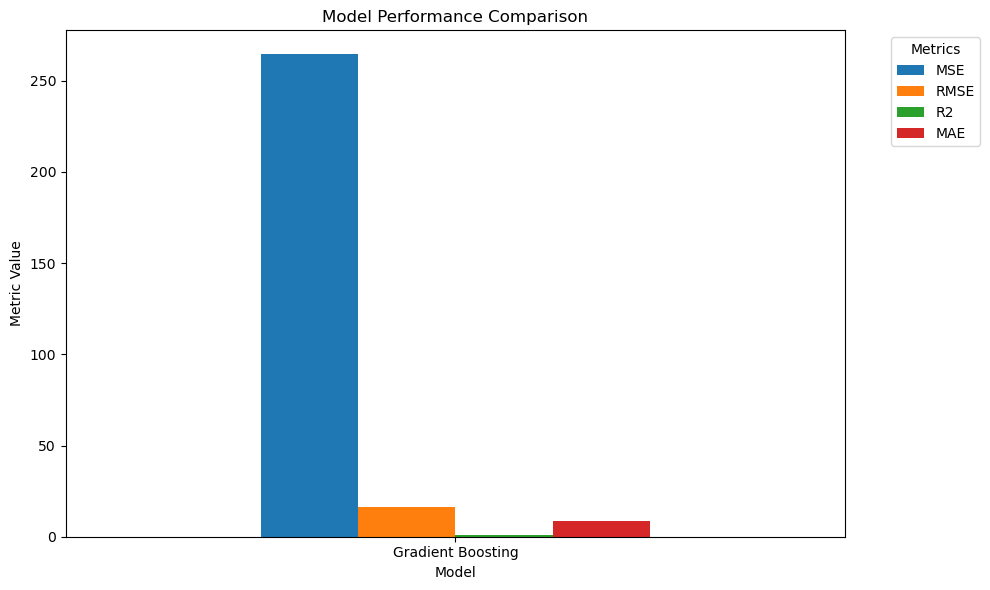

In [43]:
import matplotlib.pyplot as plt

# 1. Model Performance Comparison
plt.figure(figsize=(7, 6))
all_metrics.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Metric Value')
plt.xticks(rotation=0)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


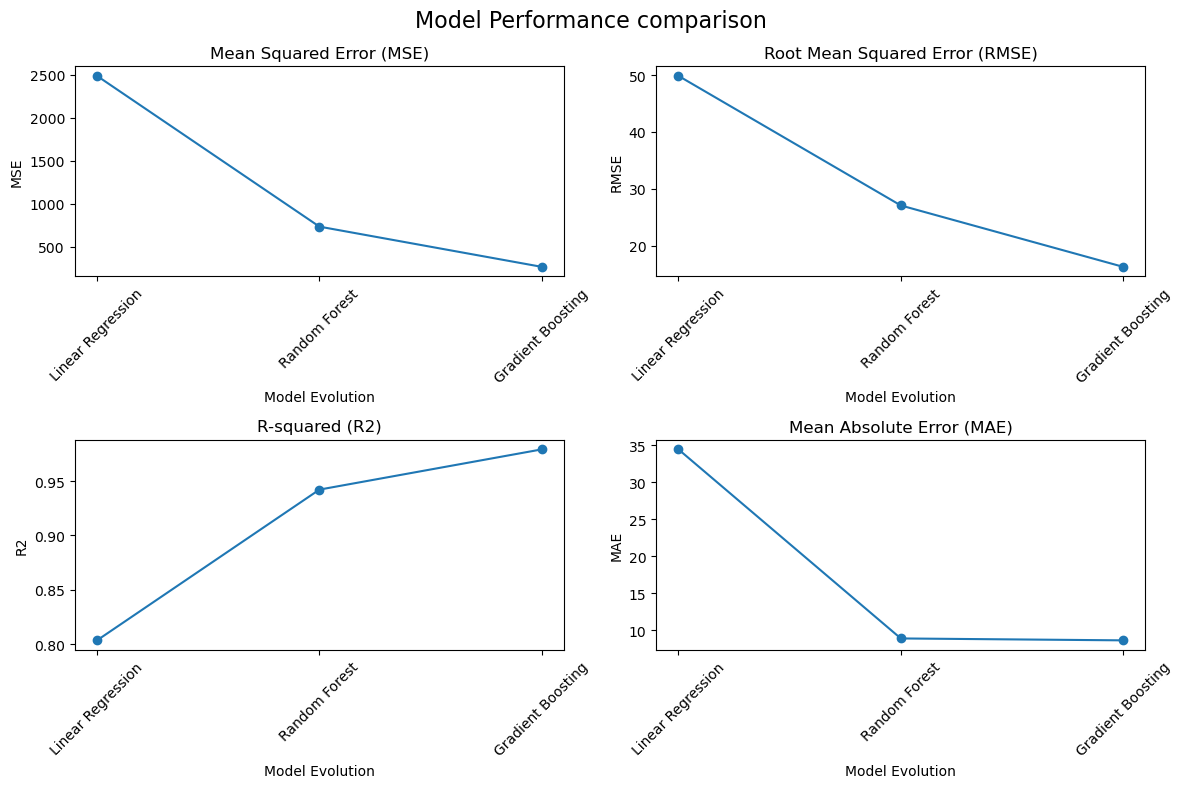

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the evaluation metrics stored in a DataFrame called 'all_metrics'
# with columns: 'Model', 'MSE', 'RMSE', 'R2', 'MAE'
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on the test set
y_pred_lr = best_lr.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_gb = best_gb.predict(X_test)

# Calculate evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return {'Model': model_name, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAE': mae}

metrics_lr = evaluate_model(y_test, y_pred_lr, 'Linear Regression')
metrics_rf = evaluate_model(y_test, y_pred_rf, 'Random Forest')
metrics_gb = evaluate_model(y_test, y_pred_gb, 'Gradient Boosting')

# Store metrics in a DataFrame
all_metrics = pd.DataFrame([metrics_lr, metrics_rf, metrics_gb])


# Create a list to store the model names in the order of evolution
model_evolution_order = ['Linear Regression', 'Random Forest', 'Gradient Boosting']

# Create a new DataFrame with the metrics sorted by the evolution order
sorted_metrics = all_metrics.set_index('Model').loc[model_evolution_order].reset_index()

# Plot the line chart for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Model Performance comparison', fontsize=16)

# MSE
axes[0, 0].plot(sorted_metrics['Model'], sorted_metrics['MSE'], marker='o')
axes[0, 0].set_title('Mean Squared Error (MSE)')
axes[0, 0].set_ylabel('MSE')

# RMSE
axes[0, 1].plot(sorted_metrics['Model'], sorted_metrics['RMSE'], marker='o')
axes[0, 1].set_title('Root Mean Squared Error (RMSE)')
axes[0, 1].set_ylabel('RMSE')

# R2
axes[1, 0].plot(sorted_metrics['Model'], sorted_metrics['R2'], marker='o')
axes[1, 0].set_title('R-squared (R2)')
axes[1, 0].set_ylabel('R2')

# MAE
axes[1, 1].plot(sorted_metrics['Model'], sorted_metrics['MAE'], marker='o')
axes[1, 1].set_title('Mean Absolute Error (MAE)')
axes[1, 1].set_ylabel('MAE')

# Rotate x-axis labels for better readability
for ax in axes.flatten():
    ax.set_xlabel('Model Evolution')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Data visualization

### Subtask:
Create visualizations to compare the performance of the three regression models and show the relationship between total sales and other features.


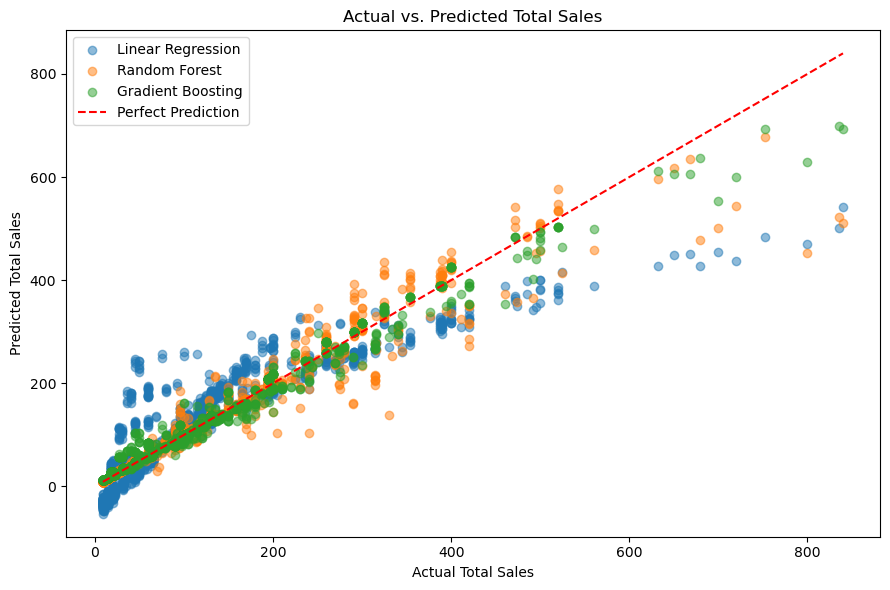

In [48]:
# 2. Actual vs. Predicted Sales
plt.figure(figsize=(9, 6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.5)
plt.scatter(y_test, y_pred_gb, label='Gradient Boosting', alpha=0.5)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Total Sales')
plt.ylabel('Predicted Total Sales')
plt.title('Actual vs. Predicted Total Sales')
plt.legend()
plt.tight_layout()
plt.show()


**Reasoning**:
Generate visualizations to compare model performance, actual vs. predicted sales, and sales vs. key features.



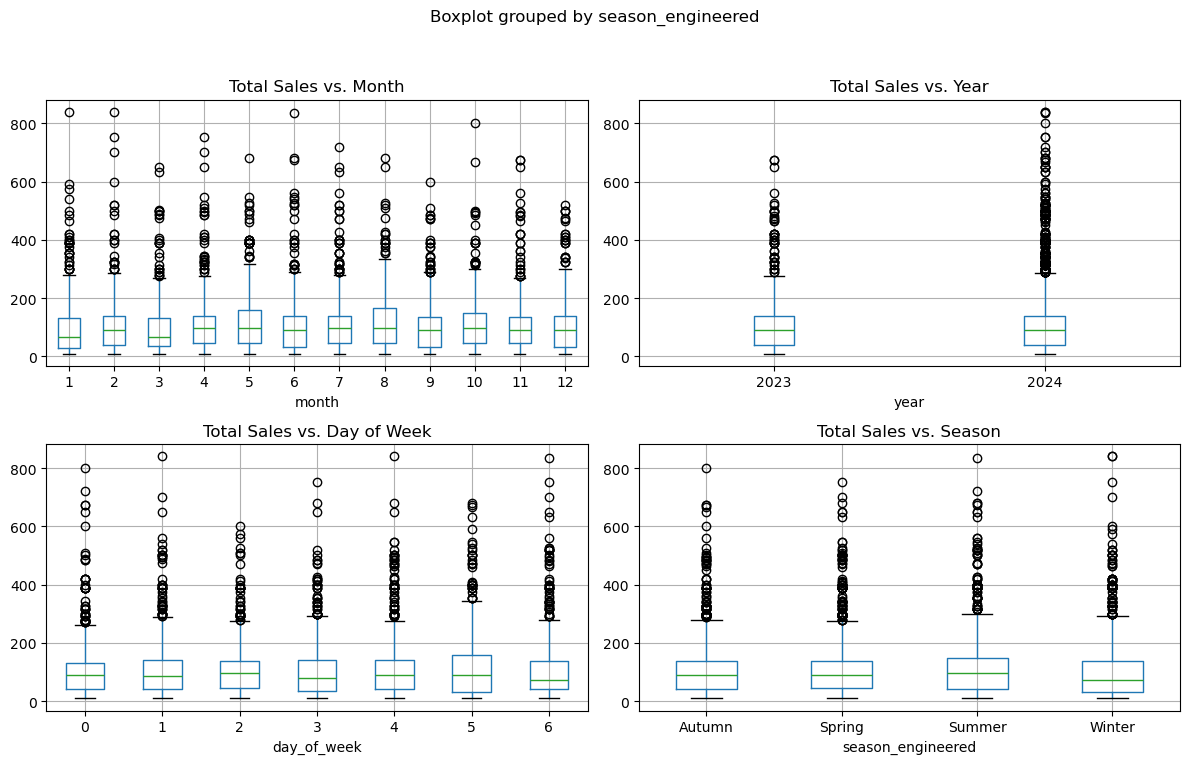

In [51]:
import matplotlib.pyplot as plt

# 3. Sales vs. Key Features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Total Sales vs. Key Features', fontsize=14)

# Month
df.boxplot(column='Total Sales', by='month', ax=axes[0, 0])
axes[0, 0].set_title('Total Sales vs. Month')

# Year
df.boxplot(column='Total Sales', by='year', ax=axes[0, 1])
axes[0, 1].set_title('Total Sales vs. Year')

# Day of Week
df.boxplot(column='Total Sales', by='day_of_week', ax=axes[1, 0])
axes[1, 0].set_title('Total Sales vs. Day of Week')

# Season Engineered
df.boxplot(column='Total Sales', by='season_engineered', ax=axes[1, 1])
axes[1, 1].set_title('Total Sales vs. Season')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()